In [3]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
# check missing values
data.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
data['label'].value_counts(normalize = True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

<Axes: xlabel='label'>

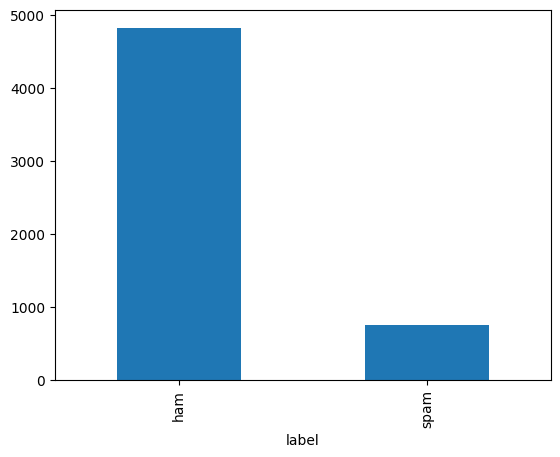

In [7]:
data['label'].value_counts().plot.bar()

In [10]:
# Create Feature and Label sets
X = data['text']
y = data['label']

In [11]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [12]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [13]:
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3733,)
Testing Data :  (1839,)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(3733, 7020)

<Axes: xlabel='token'>

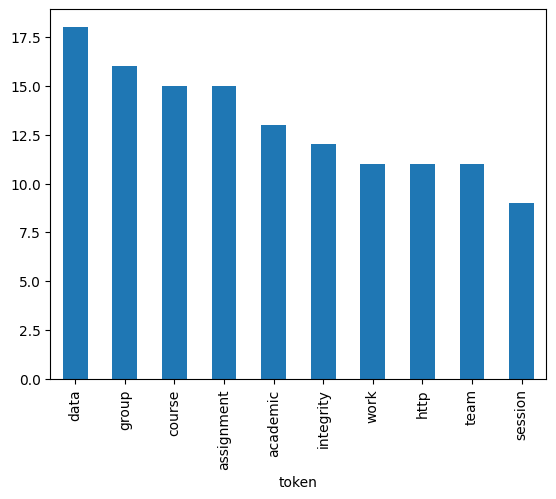

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

LogisticRegression()

In [16]:
from sklearn import metrics

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# Create a prediction set:
predictions = lr.predict(X_test_cv)

In [17]:
import pandas as pd
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1601,1
spam,31,206


In [18]:
# classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1602
        spam       1.00      0.87      0.93       237

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [19]:
# Check AUC
print(metrics.roc_auc_score(y_test,lr.predict_proba(X_test_cv)[:, 1]))

0.9909448632247666
